
National Average Milk Prices:
        date  avg_price min_price max_price  store_count
4 2025-01-13       3.13      None      None         5425
3 2025-01-20       3.23      None      None         3867
2 2025-01-27       3.19      None      None         6216
1 2025-02-03       3.19      None      None         5600
0 2025-02-10       3.20      None      None         5219


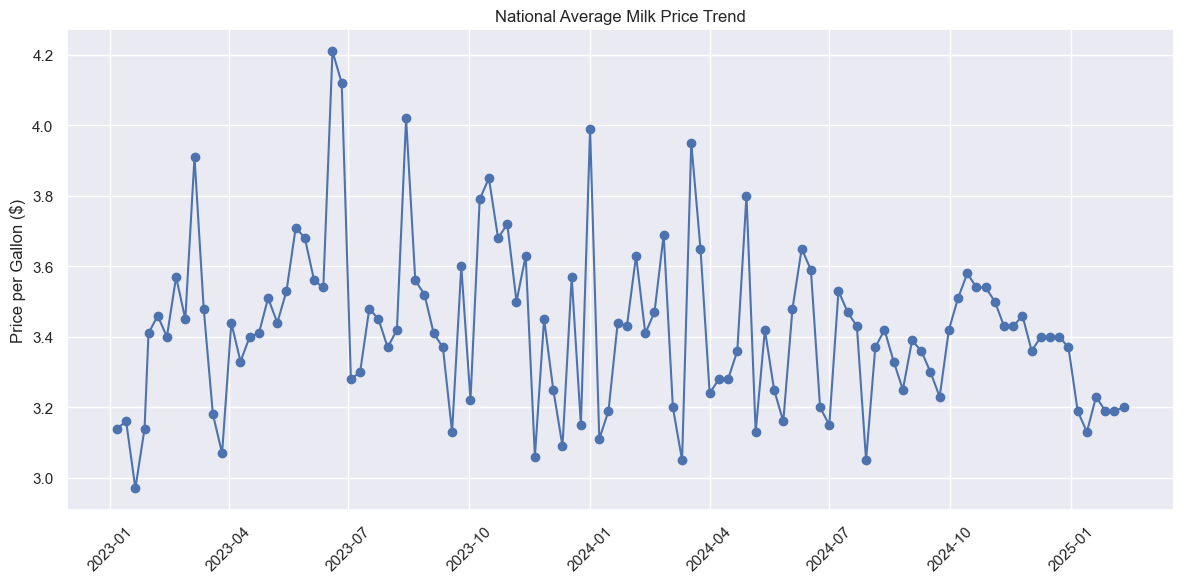

In [38]:
import requests
import base64
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os


# Adjust this path to point to your .env.local file
ENV_PATH = "C:/Users/crunc/Documents/price-tracker/.env.local"

def get_api_key():
    try:
        with open(ENV_PATH) as f:
            for line in f:
                if line.startswith('USDA_API_KEY='):
                    return line.split('=')[1].strip()
        return None
    except Exception as e:
        print(f"Error reading API key: {e}")
        return None

API_KEY = get_api_key()
BASE_URL = "https://marsapi.ams.usda.gov/services/v1.2"
REPORT_ID = '2995'

def get_auth_header():
    auth = base64.b64encode(f"{API_KEY}:".encode()).decode()
    return {
        "Authorization": f"Basic {auth}",
        "Content-Type": "application/json",
        "Accept": "application/json"
    }

def format_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d').strftime('%m/%d/%Y')

def fetch_national_milk_prices(start_date, end_date):
    url = f"{BASE_URL}/reports/{REPORT_ID}/Report Details"
    params = {
        'q': f"commodity=Milk;package=Gallon;organic=No;region=National;report_begin_date={format_date(start_date)}:{format_date(end_date)}"
    }
    response = requests.get(url, headers=get_auth_header(), params=params)
    
    if not response.ok:
        print(f"Error response: {response.text}")
        return None
    return response.json()

def process_price_data(raw_data):
    records = []
    for item in raw_data['results']:
        if item.get('region') == 'National':  # Double-check we only get national data
            record = {
                'date': pd.to_datetime(item['report_begin_date']),
                'avg_price': item.get('wtd_avg_price'),
                'min_price': item.get('price_min'),
                'max_price': item.get('price_max'),
                'store_count': item.get('store_count', 0)
            }
            records.append(record)
    
    return pd.DataFrame(records)

if __name__ == "__main__":
    end_date = datetime.now() - timedelta(days=7)
    start_date = datetime(2023, 1, 1)
    
    raw_data = fetch_national_milk_prices(
        start_date.strftime('%Y-%m-%d'),
        end_date.strftime('%Y-%m-%d')
    )
    
    if raw_data:
        df = process_price_data(raw_data)
        print("\nNational Average Milk Prices:")
        print(df.sort_values('date').tail())
        
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df['avg_price'], marker='o')
        plt.title('National Average Milk Price Trend')
        plt.ylabel('Price per Gallon ($)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

<h1> Egg Prices </h1>

In [17]:
import requests
import base64
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Set your absolute path here
ENV_PATH = "C:/Users/crunc/Documents/price-tracker/.env.local"

def get_api_key():
    try:
        with open(ENV_PATH) as f:
            for line in f:
                if line.startswith('USDA_API_KEY='):
                    return line.split('=')[1].strip()
        return None
    except Exception as e:
        print(f"Error reading API key: {e}")
        return None

API_KEY = get_api_key()
BASE_URL = "https://marsapi.ams.usda.gov/services/v1.2"
REPORT_ID = '2848'  # Updated egg report ID

def get_auth_header():
    auth = base64.b64encode(f"{API_KEY}:".encode()).decode()
    return {
        "Authorization": f"Basic {auth}",
        "Accept": "application/json"
    }

def format_date(date_input):
    """Convert various date formats to MM/DD/YYYY"""
    if isinstance(date_input, datetime):
        return date_input.strftime('%m/%d/%Y')
    elif isinstance(date_input, str):
        return datetime.strptime(date_input, '%Y-%m-%d').strftime('%m/%d/%Y')
    else:
        raise ValueError("Date must be string in YYYY-MM-DD format or datetime object")

def fetch_national_egg_prices(start_date, end_date):
    url = f"{BASE_URL}/reports/{REPORT_ID}/Report Detail Simple"  # Changed to get the detailed weighted section
    params = {
        'q': f"report_begin_date={format_date(start_date)}:{format_date(end_date)}"
    }
    
    response = requests.get(url, headers=get_auth_header(), params=params)
    
    if response.ok:
        data = response.json()
        # Save to JSON file for visualization
        with open('egg_prices_detail.json', 'w') as f:
            json.dump(data, f)
        return data
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

if __name__ == "__main__":
    # Set end date to last week
    end_date = datetime.now() - timedelta(days=7)
    start_date = datetime(2024, 1, 1)
    
    fetch_national_egg_prices(start_date, end_date)

In [10]:
import requests
import base64
from datetime import datetime, timedelta
import pandas as pd
import json
import os

# Set your absolute path here
ENV_PATH = "C:/Users/crunc/Documents/price-tracker/.env.local"

def get_api_key():
    try:
        with open(ENV_PATH) as f:
            for line in f:
                if line.startswith('USDA_API_KEY='):
                    return line.split('=')[1].strip()
        return None
    except Exception as e:
        print(f"Error reading API key: {e}")
        return None
API_KEY = get_api_key()
BASE_URL = "https://marsapi.ams.usda.gov/services/v1.2"
REPORT_ID = '2848'

def get_auth_header():
    auth = base64.b64encode(f"{API_KEY}:".encode()).decode()
    return {
        "Authorization": f"Basic {auth}",
        "Accept": "application/json"
    }

def format_date(date_input):
    """Convert various date formats to MM/DD/YYYY"""
    if isinstance(date_input, datetime):
        return date_input.strftime('%m/%d/%Y')
    elif isinstance(date_input, str):
        return datetime.strptime(date_input, '%Y-%m-%d').strftime('%m/%d/%Y')
    else:
        raise ValueError("Date must be string in YYYY-MM-DD format or datetime object")

def fetch_national_egg_prices(start_date, end_date):
    url = f"{BASE_URL}/reports/{REPORT_ID}/Report Detail Simple"
    params = {
        'q': f"report_begin_date={format_date(start_date)}:{format_date(end_date)}"
    }
    
    response = requests.get(url, headers=get_auth_header(), params=params)
    
    if response.ok:
        data = response.json()
        
        # Filter and aggregate prices by report date
        date_prices = {}
        for item in data['results']:
            if (item['region'] == 'National' and 
                item['class'] == 'Large' and
                item['egg_type'] == 'Cartoned' and
                item['color'] == 'White' and
                item['environment'] == 'Caged' and
                item['delivery'] == 'Delivered Warehouse' and
                item['grade'] == 'Grade A'):
                
                report_date = datetime.strptime(item['report_date'], '%m/%d/%Y')
                price = float(item['avg_price']) / 100  # Convert cents to dollars
                
                if report_date not in date_prices:
                    date_prices[report_date] = []
                date_prices[report_date].append(price)
        
        # Process aggregated prices
        prices = []
        for date, price_list in date_prices.items():
            prices.append({
                'date': date,
                'mean': sum(price_list) / len(price_list),
                'min': min(price_list),
                'max': max(price_list)
            })
        
        # Convert to DataFrame and sort
        df = pd.DataFrame(prices)
        df = df.sort_values('date')
        
        # Save both raw and processed data
        df.to_csv('egg_prices_processed.csv', index=False)
        with open('egg_prices_raw.json', 'w') as f:
            json.dump(data, f)
            
        return df

def main():
    # Set end date to last week
    end_date = datetime.now() - timedelta(days=7)
    start_date = datetime(2025, 1, 1)
    
    df = fetch_national_egg_prices(start_date, end_date)
    if df is not None:
        print("\nMost recent prices:")
        print(df.tail())
        
        print("\nPrice statistics:")
        print(df.describe())

if __name__ == "__main__":
    main()


Most recent prices:
        date    mean     min     max
3 2025-01-27  7.5169  7.5169  7.5169
2 2025-02-03  7.8569  7.8569  7.8569
1 2025-02-10  8.1369  8.1369  8.1369
0 2025-02-17  8.3869  8.3869  8.3869

Price statistics:
                      date      mean       min       max
count                    4  4.000000  4.000000  4.000000
mean   2025-02-06 12:00:00  7.974400  7.974400  7.974400
min    2025-01-27 00:00:00  7.516900  7.516900  7.516900
25%    2025-02-01 06:00:00  7.771900  7.771900  7.771900
50%    2025-02-06 12:00:00  7.996900  7.996900  7.996900
75%    2025-02-11 18:00:00  8.199400  8.199400  8.199400
max    2025-02-17 00:00:00  8.386900  8.386900  8.386900
std                    NaN  0.374021  0.374021  0.374021


In [ ]:
import pandas as pd
from datetime import datetime
import re

def parse_egg_price_text(text):
    """Parse the fixed-width text format of legacy egg price reports"""
    # Split into individual reports
    reports = text.split('WA_PY001')
    
    all_data = []
    dates = set()
    
    for report in reports:
        if not report.strip():
            continue
            
        # Extract the date from the header
        date_match = re.search(r'(\w+\.\s+\w+\s+\d+,\s+\d{4})', report)
        report_date = None
        if date_match:
            try:
                report_date = datetime.strptime(date_match.group(1), '%a. %b %d, %Y')
                dates.add(report_date)
            except ValueError:
                print(f"Could not parse date from: {date_match.group(1)}")
                continue
        
        # Find the price data section
        lines = report.split('\n')
        capture = False
        
        for line in lines:
            # Start capturing after the headers
            if 'REGIONS' in line and 'EX LARGE' in line:
                capture = True
                continue
            
            # Stop capturing when we hit the computation note
            if line.strip().startswith('Computed'):
                break
                
            if capture and line.strip():
                # Skip the combined line
                if not line.strip().startswith('COMBINED'):
                    # Split on multiple spaces to handle variable spacing
                    parts = [p for p in re.split(r'\s{2,}', line.strip()) if p]
                    
                    try:
                        if len(parts) == 4:  # Region, Ex Large, Large, Medium
                            all_data.append({
                                'date': report_date,
                                'region': parts[0],
                                'ex_large_price': float(parts[1]) / 100,  # Convert cents to dollars
                                'large_price': float(parts[2]) / 100,
                                'medium_price': float(parts[3]) / 100
                            })
                    except ValueError as e:
                        print(f"Could not parse line: {line}")
                        print(f"Parts: {parts}")
                        print(f"Error: {e}")
    
    df = pd.DataFrame(all_data)
    
    # Sort dates for validation
    dates = sorted(dates)
    
    # Validate weekly sequence
    date_gaps = []
    for i in range(len(dates)-1):
        days_between = (dates[i+1] - dates[i]).days
        if days_between != 7:
            date_gaps.append((dates[i], dates[i+1], days_between))
    
    return df, dates, date_gaps

# Read the file
with open('2024_egg_prices', 'r') as file:
    text = file.read()

# Parse the data
df, dates, date_gaps = parse_egg_price_text(text)

# Print basic info about the dataset
print("\nDataset Info:")
print(df.info())

print("\nDate Range:")
print(f"Start: {min(dates)}")
print(f"End: {max(dates)}")
print(f"Number of weeks: {len(dates)}")

if date_gaps:
    print("\nGaps in weekly sequence:")
    for start, end, days in date_gaps:
        print(f"Gap between {start.strftime('%Y-%m-%d')} and {end.strftime('%Y-%m-%d')}: {days} days")

# Calculate national averages
national_avgs = df.groupby('date').agg({
    'large_price': ['mean', 'min', 'max'],
    'ex_large_price': ['mean', 'min', 'max'],
    'medium_price': ['mean', 'min', 'max']
}).round(2)

print("\nNational Average Prices (First 5 weeks):")
print(national_avgs.head())

print("\nNational Average Prices (Last 5 weeks):")
print(national_avgs.tail())

# Basic statistics by region
print("\nPrice Statistics by Region:")
region_stats = df.groupby('region')['large_price'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)
print(region_stats)

# Save to CSV
df.to_csv('egg_prices_2024.csv', index=False)
national_avgs.to_csv('egg_prices_2024_national_averages.csv')

print("\nData saved to CSV files: egg_prices_2024.csv and egg_prices_2024_national_averages.csv")